# The Image Captioning Using CNN-RNN

In this project, the first step is to make a CNN-RNN network to do image captioning.

First, import some important libraries

In [7]:
# import lib
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pathlib import Path

## 1. Import dataset flicker 8k and explore the dataset

The flicker 8k is used in this project, because this is small. Each sentence have five captions. 

In [83]:
import pandas as pd
# caption_file = './flickr8k/captions.txt'
caption_file = './caption_val.txt'
dataset = pd.read_csv(caption_file)

Now, exploring the data structure of flicker 8k

In [84]:
dataset.head(10)

,image,caption
0,1003163366_44323f5815.jpg,A man lays on a bench while his dog sits by him .
1,1003163366_44323f5815.jpg,A man lays on the bench to which a white dog i...
2,1003163366_44323f5815.jpg,a man sleeping on a bench outside with a white...
3,1003163366_44323f5815.jpg,A shirtless man lies on a park bench with his ...
4,1003163366_44323f5815.jpg,man laying on bench holding leash of dog sitti...
5,1007129816_e794419615.jpg,A man in an orange hat starring at something .
6,1007129816_e794419615.jpg,A man wears an orange hat and glasses .
7,1007129816_e794419615.jpg,A man with gauges and glasses is wearing a Bli...
8,1007129816_e794419615.jpg,A man with glasses is wearing a beer can croch...
9,1007129816_e794419615.jpg,The man with pierced ears is wearing glasses a...


There are 40455 captions and images, 6472 in train and 1619 in val.

In [85]:
image_names = dataset['image'].unique()
image_captions = dataset['caption']
print("There are {} images".format(len(image_names)))
print("There are {} captions".format(len(image_captions)))
print(image_names[0])

There are 1619 images
There are 8095 captions
1003163366_44323f5815.jpg


The image and corresponding captions are as follow:

./image_train/1007320043_627395c3d8.jpg


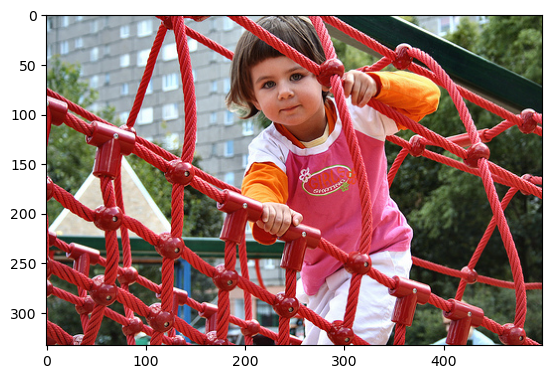

A child playing on a rope net .
A little girl climbing on red roping .
A little girl in pink climbs a rope bridge at the park .
A small child grips onto the red ropes at the playground .
The small child climbs on a red ropes on a playground .


In [63]:
image_idx = 3

# get the path of image
# image_path = "./flickr8k/Images/"+image_names[image_idx]
image_path = "./image_train/"+image_names[image_idx]
print(image_path)
img=mpimg.imread(image_path)
plt.imshow(img)
plt.show()

#image consits of 5 captions,
for i in range(image_idx*5,image_idx*5+5):
    print(image_captions[i])

Another task is using the image name to find the corresponding captions:

./flickr8k/Images/1001773457_577c3a7d70.jpg


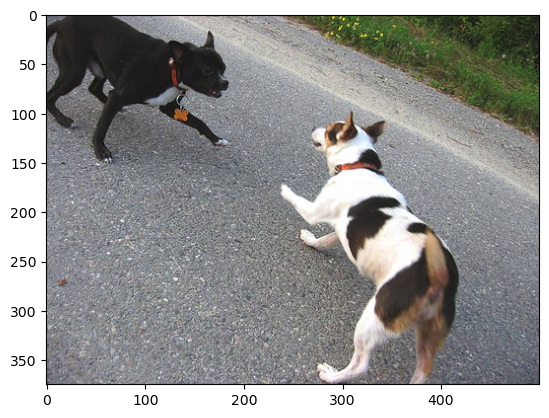

A black dog and a spotted dog are fighting
A black dog and a tri-colored dog playing with each other on the road .
A black dog and a white dog with brown spots are staring at each other in the street .
Two dogs of different breeds looking at each other on the road .
Two dogs on pavement moving toward each other .


In [32]:
image_idx = 1

train_path = "./image_train"
image_train = Path.cwd() / train_path
list_train = os.listdir(image_train)
#print(list_train[image_idx])

image_path = "./flickr8k/Images/"+list_train[image_idx]
print(image_path)
img=mpimg.imread(image_path)
plt.imshow(img)
plt.show()

extract_rule = (dataset['image']==list_train[image_idx])
thisimage_with_captions = dataset[extract_rule]
for i in thisimage_with_captions['caption']:
    print(i)

## 2. Construct data loader

Some helper functions from link: https://gist.github.com/MdTeach/2571ca46af9d9661de52d2adb879f801

In [6]:
from torch.utils.data import DataLoader,Dataset